<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/8.%20%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B%20%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%20%E2%84%9611.%20%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B2%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обучить модели машинного обучения для решения задачи классификации, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравнить их точность и быстродействие.

Датасет: https://www.kaggle.com/c/titanic/data

Learning rate set to 0.008911
0:	learn: 0.6862876	total: 7.18ms	remaining: 7.18s
1:	learn: 0.6814268	total: 12.7ms	remaining: 6.33s
2:	learn: 0.6753602	total: 17.2ms	remaining: 5.72s
3:	learn: 0.6700637	total: 20.6ms	remaining: 5.13s
4:	learn: 0.6639504	total: 24.4ms	remaining: 4.86s
5:	learn: 0.6583173	total: 28.2ms	remaining: 4.67s
6:	learn: 0.6534403	total: 31.1ms	remaining: 4.41s
7:	learn: 0.6482757	total: 35.3ms	remaining: 4.37s
8:	learn: 0.6436750	total: 38.3ms	remaining: 4.21s
9:	learn: 0.6392226	total: 42.9ms	remaining: 4.24s
10:	learn: 0.6342877	total: 46.6ms	remaining: 4.19s
11:	learn: 0.6293067	total: 51ms	remaining: 4.2s
12:	learn: 0.6245909	total: 54.9ms	remaining: 4.17s
13:	learn: 0.6201889	total: 57.8ms	remaining: 4.07s
14:	learn: 0.6158253	total: 61.8ms	remaining: 4.06s
15:	learn: 0.6121338	total: 65ms	remaining: 4s
16:	learn: 0.6072458	total: 68.6ms	remaining: 3.97s
17:	learn: 0.6028327	total: 72.5ms	remaining: 3.96s
18:	learn: 0.5992733	total: 74.8ms	remaining: 3.86s


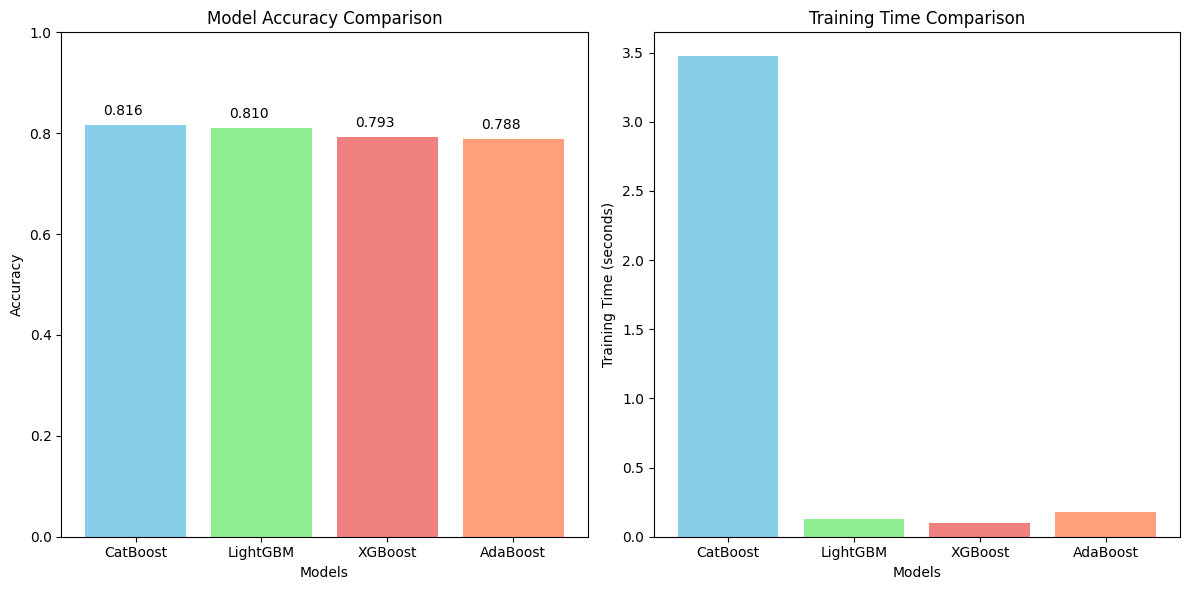

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time

train_data = pd.read_csv('titanic/train.csv')
test_data = pd.read_csv('titanic/test.csv')

X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

catboost_model = CatBoostClassifier()
lgbm_model = LGBMClassifier()
xgboost_model = XGBClassifier()
adaboost_model = AdaBoostClassifier()

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

start_time = time.time()
catboost_model.fit(X_train_preprocessed, y_train)
catboost_time = time.time() - start_time

start_time = time.time()
lgbm_model.fit(X_train_preprocessed, y_train)
lgbm_time = time.time() - start_time

start_time = time.time()
xgboost_model.fit(X_train_preprocessed, y_train)
xgboost_time = time.time() - start_time

start_time = time.time()
adaboost_model.fit(X_train_preprocessed, y_train)
adaboost_time = time.time() - start_time

catboost_preds = catboost_model.predict(X_val_preprocessed)
lgbm_preds = lgbm_model.predict(X_val_preprocessed)
xgboost_preds = xgboost_model.predict(X_val_preprocessed)
adaboost_preds = adaboost_model.predict(X_val_preprocessed)

catboost_accuracy = accuracy_score(y_val, catboost_preds)
lgbm_accuracy = accuracy_score(y_val, lgbm_preds)
xgboost_accuracy = accuracy_score(y_val, xgboost_preds)
adaboost_accuracy = accuracy_score(y_val, adaboost_preds)

print(f'CatBoost Accuracy: {catboost_accuracy}, Time: {catboost_time:.3f} seconds')
print(f'LightGBM Accuracy: {lgbm_accuracy}, Time: {lgbm_time:.3f} seconds')
print(f'XGBoost Accuracy: {xgboost_accuracy}, Time: {xgboost_time:.3f} seconds')
print(f'AdaBoost Accuracy: {adaboost_accuracy}, Time: {adaboost_time:.3f} seconds')

import matplotlib.pyplot as plt

models = ['CatBoost', 'LightGBM', 'XGBoost', 'AdaBoost']
accuracies = [catboost_accuracy, lgbm_accuracy, xgboost_accuracy, adaboost_accuracy]
times = [catboost_time, lgbm_time, xgboost_time, adaboost_time]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{acc:.3f}', ha='center', color='black')

plt.subplot(1, 2, 2)
plt.bar(models, times, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Training Time Comparison')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# Обучить модели машинного обучения для решения задачи **регрессии**, используя следующие boosting-алгоритмы: [CatBoost](https://catboost.ai/en/docs/concepts/python-reference_catboostregressor), [Light GBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html), [XGBoost](https://kirenz.github.io/regression/docs/xgboost-regression.html), [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html). Сравнить их точность и быстродействие.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

Learning rate set to 0.034197
0:	learn: 11.4752212	total: 248ms	remaining: 4m 7s
1:	learn: 11.3203444	total: 453ms	remaining: 3m 46s
2:	learn: 11.1698003	total: 632ms	remaining: 3m 29s
3:	learn: 11.0546151	total: 827ms	remaining: 3m 25s
4:	learn: 10.9422441	total: 1.01s	remaining: 3m 20s
5:	learn: 10.8146031	total: 1.18s	remaining: 3m 16s
6:	learn: 10.6835465	total: 1.36s	remaining: 3m 13s
7:	learn: 10.5621664	total: 1.54s	remaining: 3m 11s
8:	learn: 10.4459550	total: 1.73s	remaining: 3m 10s
9:	learn: 10.3008494	total: 1.91s	remaining: 3m 9s
10:	learn: 10.2071278	total: 2.1s	remaining: 3m 8s
11:	learn: 10.0956854	total: 2.28s	remaining: 3m 8s
12:	learn: 10.0009949	total: 2.47s	remaining: 3m 7s
13:	learn: 9.8970470	total: 2.65s	remaining: 3m 6s
14:	learn: 9.7955134	total: 2.82s	remaining: 3m 5s
15:	learn: 9.7126725	total: 3s	remaining: 3m 4s
16:	learn: 9.6146116	total: 3.17s	remaining: 3m 3s
17:	learn: 9.5137985	total: 3.35s	remaining: 3m 2s
18:	learn: 9.4262012	total: 3.52s	remaining: 

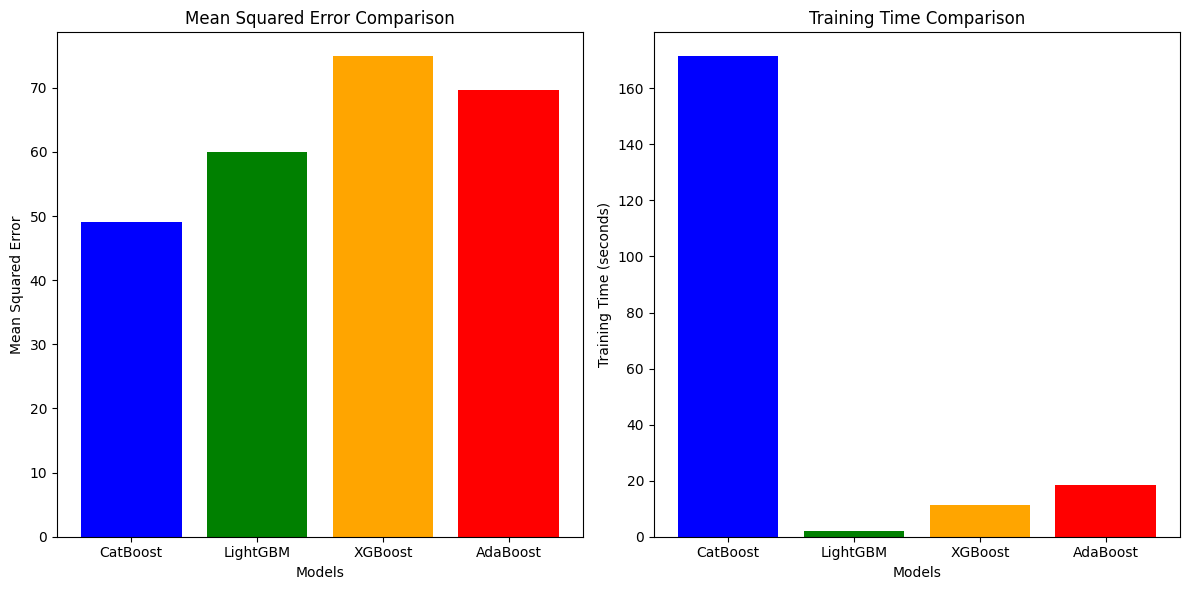

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
import time

data = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)
catboost_time = time.time() - start_time
catboost_mse = mean_squared_error(y_test, catboost_pred)

start_time = time.time()
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)
lgbm_time = time.time() - start_time
lgbm_mse = mean_squared_error(y_test, lgbm_pred)

start_time = time.time()
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
xgboost_pred = xgboost_model.predict(X_test)
xgboost_time = time.time() - start_time
xgboost_mse = mean_squared_error(y_test, xgboost_pred)

start_time = time.time()
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_time = time.time() - start_time
adaboost_mse = mean_squared_error(y_test, adaboost_pred)

models = ['CatBoost', 'LightGBM', 'XGBoost', 'AdaBoost']
mse_values = [catboost_mse, lgbm_mse, xgboost_mse, adaboost_mse]
time_values = [catboost_time, lgbm_time, xgboost_time, adaboost_time]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Mean Squared Error Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.bar(models, time_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Training Time Comparison')
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()